# Analytica - Modelling

## Run 'fe' Notebook

In [1]:
## Running the entire 'fe' notebook to apply these practices within this modelling 

%run ./fe.ipynb

X_train:   (2291, 20)
y_train:   (2291,)

X_test:    (573, 20)
y_test:    (573,)
Sum of nulls: 0


In [2]:
##  Additional library/module imporitng

import statsmodels.tools
import seaborn as sns

## Modelling

### Precise Model Train

In [12]:
## Fit train set on the precise model and check summary

lin_reg = sm.OLS(y_train, X_train_fe[feature_cols_pre])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     8432.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:03:14   Log-Likelihood:                -3835.4
No. Observations:                2291   AIC:                             7701.
Df Residuals:                    2276   BIC:                             7787.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   69.2120      0.178    387.919      0.000      68.862      69.562
Under_five_deaths                       -4.1822      0.080    -52.548      0.000      -4.338      -4.026
Adult_mortality                         -6.2478      0.075    -82.994      0.000      -6.395      -6.100
BMI                                     -0.5530      0.048    -11.580      0.000      -0.647      -0.459
Schooling                                0.5470      0.059      9.299      0.000       0.432       0.662
Region_Asia                             -0.2588      0.115     -2.259      0.024      -0.483      -0.034
Region_Central America and Caribbean     1.5133      0.121     12.497      0.000       1.276       1.751
Region_European Union                    0.7187      0.141      5.114      0.000       0.443       0.994
Region_Middle East                      -0.2255      0.145     -1.552      0.121      -0.510       0.059
Region_North America                     1.4279      0.241      5.926      0.000       0.955       1.900
Region_Oceania                          -0.7938      0.148     -5.365      0.000      -1.084      -0.504
Region_Rest of Europe                    0.3350      0.149      2.254      0.024       0.044       0.627
Region_South America                     1.0845      0.137      7.927      0.000       0.816       1.353
Incidents_HIV_log                       -1.2380      0.234     -5.295      0.000      -1.697      -0.780
GDP_per_capita_log                       5.0625      0.259     19.568      0.000       4.555       5.570
==============================================================================
Omnibus:                       54.949   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.203
Skew:                           0.325   Prob(JB):                     1.14e-14
Kurtosis:                       3.500   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
## Print main results values

print(f"R-squared   = 98.1%")
print(f"AIC         = 7701")
print(f"BIC         = 7787")
print(f"Cond. No.   = 20.2")

R-squared   = 98.1%
AIC         = 7701
BIC         = 7787
Cond. No.   = 20.2


### Precise Model Test

In [14]:
## Predict results of the precise model

# Train set
y_pred = results.predict(X_train_fe[feature_cols_pre])
y_pred_rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

# Test test
y_test_pred = results.predict(X_test_fe[feature_cols_pre])
y_test_pred_rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)

# Print RMSE values
print(f'Test RMSE = {(y_test_pred_rmse)}')

Test RMSE = 1.297319851703965


### Precise Model Test Prediction Comparison

In [15]:
## Preview comparative results from precise model's original and predicted target

results_pre_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_pre_df.head(10)

,Actual,Predicted
1327,74.9,75.189822
2677,52.8,54.425111
906,77.3,77.945101
696,76.5,76.259130
898,53.1,55.328733
1676,80.8,78.571824
338,56.6,57.731527
2827,54.3,58.193324
2735,72.7,74.329187
1608,71.0,71.060550


---

#### Model Overview

- **R-squared:** 98.1%  
  - This indicates that 98.1% of the variance in life expectancy is explained by the model's predictors.
  - The model explains most variability in life expectancy, implying a strong predictive capability.
- **Adjusted R-squared:** 98.1%  
  - Adjusted for the number of predictors, maintaining the high explanatory power.
- **Condition Number:** 20.2  
  - Indicates low multicollinearity issues. We decided on an threshold of 30, below that was acceptable.

---

##### Positive Impact on Life Expectancy
- **Schooling:** Possitive coefficient and a low P value. More education may lead to a longer life expectancy.
- **GDP per capita (log-transformed):** Economic growth strongly correlates with higher life expectancy.

##### Negative Impact on Life Expectancy
- **Under Five Deaths,Adult Mortality , BMI :** Higher mortality rates significantly reduce life expectancy. As for BMI, suggests potential health concerns at higher BMI levels.
- **HIV Incidents (log-transformed):** Highlights the detrimental effect of HIV prevalence on health.
---

##### Tested against predictions
- **Test RMSE:** 1.2973  
  - The average deviation between predicted and actual life expectancy values of 1.29 Years
 
#### p-Values of Key Predictors

 **Low p-values (p < 0.05) - Statistically Significant**
- Under Five Deaths, Adult Mortality, BMI, Schooling:, Incidents HIV (log-transformed), GDP per Capita (log-transformed)

 **High p-values (p > 0.05) - Not Statistically Significant**
- **Region Effects:**
  - Asia, Middle East, Rest of Europe:

### Minimalistic Model

In [7]:
## Fit train set on the minimalistic model and check summary

lin_reg = sm.OLS(y_train, X_train_fe[feature_cols_min])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.222e+04
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:02:58   Log-Likelihood:                -4478.5
No. Observations:                2291   AIC:                             8965.
Df Residuals:                    2287   BIC:                             8988.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                72.1526      0.042   1722.544      0.000      72.070      72.235
Under_five_deaths    -5.4946      0.085    -64.277      0.000      -5.662      -5.327
Adult_mortality      -6.6580      0.071    -93.800      0.000      -6.797      -6.519
BMI                  -0.1304      0.048     -2.735      0.006      -0.224      -0.037
==============================================================================
Omnibus:                       53.014   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.243
Skew:                           0.299   Prob(JB):                     6.80e-15
Kurtosis:                       3.571   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
## Print main results values

print(f"R-squared   = 96.7%")
print(f"AIC         = 8965")
print(f"BIC         = 8988")
print(f"Cond. No.   = 4.14")

R-squared   = 96.7%
AIC         = 8965
BIC         = 8988
Cond. No.   = 4.14


### Minimalistic Model Test

In [9]:
## Predict results of the minimalistic model

# Train set
y_pred = results.predict(X_train_fe[feature_cols_min])
y_pred_rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

# Test test
y_test_pred = results.predict(X_test_fe[feature_cols_min])
y_test_pred_rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)

# Print RMSE values
print(f'Test RMSE = {(y_test_pred_rmse)}')

Test RMSE = 1.6713443054886408


### Minimalistic Model Test Prediction Comparison

In [ ]:
## Preview comparative results from minimalistic model's original and predicted target

results_min_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_min_df.head(10)

,Actual,Predicted
1327,74.9,74.720809
2677,52.8,54.254699
906,77.3,78.039202
696,76.5,75.181601
898,53.1,55.965291
1676,80.8,78.411471
338,56.6,58.314695
2827,54.3,57.114282
2735,72.7,73.820917
1608,71.0,70.403555


---

#### Model Overview

- **R-squared:** 96.7%  
  - The model explains 96.7% of the variance in life expectancy, indicating a strong relationship between the predictors and the dependent variable.
- **Adjusted R-squared:** 96.7%  
  - Adjusted for the number of predictors, this high value reinforces the model’s explanatory power.
- **Condition Number:** 4.14  
  - The low condition number suggests no significant multicollinearity issues.

---

##### Positive Impact on Life Expectancy
- **None identified in the model.** The predictors used are all negatively related to life expectancy.

##### Negative Impact on Life Expectancy
- **Under Five Deaths:** Higher under-five mortality is strongly associated with a decrease in life expectancy.
- **Adult Mortality:** Higher adult mortality rates negatively affect life expectancy.
- **BMI:** Increased BMI appears to reduce life expectancy, indicating a potential health risk at higher BMI levels.

---

##### Tested against predictions
- **Test RMSE:** 1.671  
  - The model's average deviation between predicted and actual life expectancy values is approximately 1.67 years, indicating reasonable prediction accuracy.

---

#### p-Values of Key Predictors

**Low p-values (p < 0.05) - Statistically Significant**
- Under Five Deaths
- Adult Mortality
- BMI

---

### Region Bias Acknowledgment

RMSE for Region_Asia: 1.41075
RMSE for Region_Central America and Caribbean: 1.46508
RMSE for Region_European Union: 1.13664
RMSE for Region_Middle East: 1.40315
RMSE for Region_North America: 0.69966
RMSE for Region_Oceania: 1.80102
RMSE for Region_Rest of Europe: 0.74370
RMSE for Region_South America: 0.99081


<Axes: >

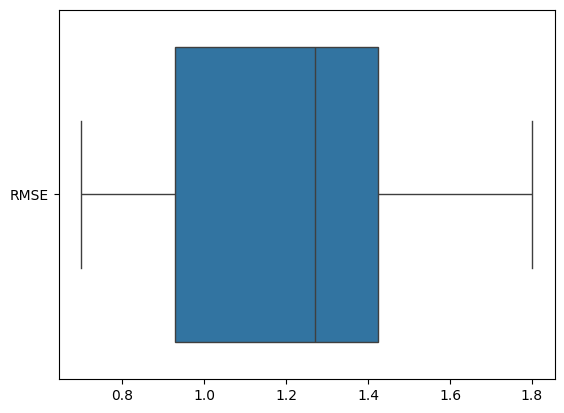

In [16]:
## Calculate the bias in using Region as a feature in the 'Precise' model
## Do NOT run the minimalistic model prior to this

# Retrieve a list of the region columns
regions = list(X_test_fe.columns[X_test_fe.columns.str.contains('Region_')])

# Create an empty list
rmse_dict = {}

# Loop through each region column
for region in regions:

    # Create a mask of the dataframe for records belonging to the region
    region_mask = X_test_fe[region] == 1

    # Filter the dataframe for only records of the particular region
    X_test_region = X_test_fe[region_mask]

    # Predict the life expectancy using the 'Precise' model
    y_test_pred_region = results.predict(X_test_region[feature_cols_pre])

    # Calculate the RMSE
    rmse = statsmodels.tools.eval_measures.rmse(y_test[region_mask], y_test_pred_region)

    # Append the RMSE to the dictionary
    rmse_dict[region] = rmse

    # Print the RMSE calculated from records of the particular region
    print(f'RMSE for {region}: {rmse:.5f}')

# Create a dataframe
region_bias = pd.DataFrame(rmse_dict.items(), columns = [["Region", "RMSE"]])

region_bias.describe()

# Boxplot
sns.boxplot(region_bias['RMSE'], orient = 'h')

---

The RMSE values across regions vary, suggesting some level of predictive accuracy based on region. North America and Rest of Europe show the best prediction accuracy, with RMSEs under 1 year. In contrast, Oceania and Central America & Caribbean have the highest RMSEs, indicating less accurate predictions for these regions. Overall, these disparities in RMSE highlight that the model’s performance may differ across different geographic areas. 

---